# Лабораторная работа №5: Деревья решений
--------------
### Шаина Мария 6132-010402D

In [1]:
# Импортируем необходимые библиотеки и модули 
import numpy as np
import pandas as pd
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_wine, make_classification
import matplotlib.pyplot as plt

1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью `pd.factorize` / `pd.get_dummies`

In [2]:
data = load_wine()

# Значение ключа DESCR – это краткое описание набора данных
print(data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализовапнного датасета `KNeighborsClassifier` (без использования конвееров)

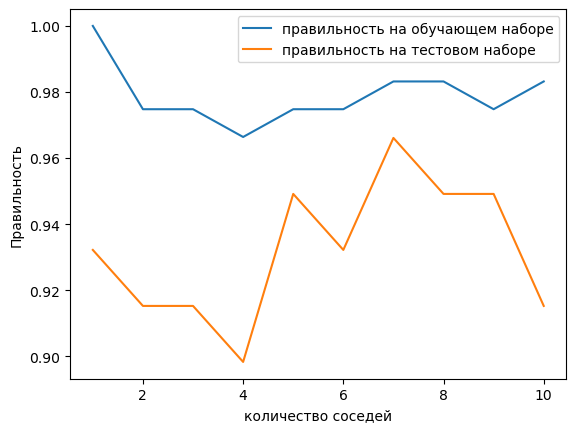

In [3]:
X, y = data.data, data.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
  # строим модель
  knn = KNeighborsClassifier( n_neighbors = n_neighbors )
  knn.fit( X_train_scaled, y_train )
 # записываем правильность на обучающем наборе
  training_accuracy.append( knn.score(X_train_scaled, y_train) )
  # записываем правильность на тестовом наборе
  test_accuracy.append( knn.score(X_test_scaled, y_test) )

plt.plot( neighbors_settings, training_accuracy, label="правильность на обучающем наборе" )
plt.plot( neighbors_settings, test_accuracy, label="правильность на тестовом наборе" )
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
g = plt.legend()

1.2. То же самое и использованием `sklearn.pipeline.Pipeline`

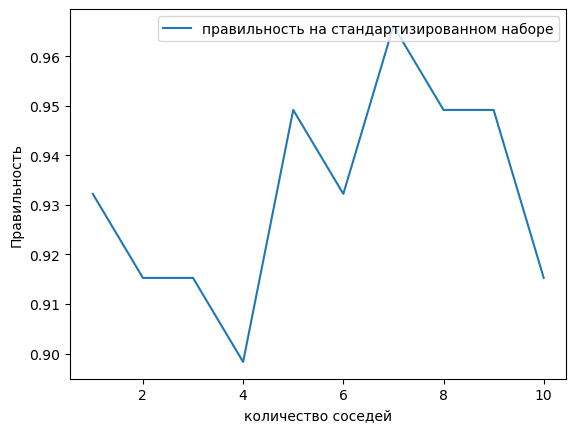

In [4]:
test_std_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # Создание модели на методе k-ближайших соседей pipeline
    pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = n_neighbors))
    pipe.fit(X_train, y_train)  # apply scaling on training data
  # записываем правильность на тестовом наборе
    test_std_accuracy.append( pipe.score(X_test, y_test) )


plt.plot( neighbors_settings, test_std_accuracy, label="правильность на стандартизированном наборе" )
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
g = plt.legend()

1.3. С помощью `GridSearchCV` произвести подбор гиперпараметра `KNeighborsClassifier` (`n_neighbors`) и выведите значение гиперпараметра и метрику для наилучшей модели

In [5]:
grid_params = {
    'n_neighbors': [*range(1, 11, 1)]
}

search = GridSearchCV(KNeighborsClassifier(),
                      param_grid=grid_params, 
                      scoring=['accuracy'], 
                      n_jobs=-1, 
                      cv=5,
                      verbose=3,
                      refit='accuracy',
                      )
searching_results = search.fit(X_train, y_train)
pridictions = search.predict(X_test)
print(f'Лучшие параметры {search.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры {'n_neighbors': 1}


In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train_scaled, y_train)
predictions = knn_classifier.predict(X_test_scaled)

score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.941304347826087
Точность на тестовой выборке:  0.9322033898305084


2.1. Продемонстрировать работу `DecisionTreeClassifier`, посчитать метрики качества на отложенной выборке

In [7]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

score = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.95
Точность на тестовой выборке:  0.8983050847457628


2.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего дерева (перебрать `max_depth`, `max_features` и может быть что-то ещё)


In [8]:
params = dict(max_depth = [*range(1, 10, 3)], 
              max_features = [*range(1, 7, 3)],
              min_samples_split = [*range(3, 12, 3)],
              min_samples_leaf = [*range(1, 10, 3)]
              )

In [9]:
search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                      param_grid=params, 
                      scoring=['accuracy'], 
                      n_jobs=1, 
                      cv=5,
                      verbose=3,
                      refit='accuracy',
                      )
searching_results = search.fit(X_train, y_train)
pridictions = search.predict(X_test)
print(f'Лучшие параметры {search.best_params_}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=3; accuracy: (test=0.458) total time=   0.0s
[CV 2/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=3; accuracy: (test=0.458) total time=   0.0s
[CV 3/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=3; accuracy: (test=0.583) total time=   0.0s
[CV 4/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=3; accuracy: (test=0.625) total time=   0.0s
[CV 5/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=3; accuracy: (test=0.522) total time=   0.0s
[CV 1/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=6; accuracy: (test=0.458) total time=   0.0s
[CV 2/5] END max_depth=1, max_features=1, min_samples_leaf=1, min_samples_split=6; accuracy: (test=0.458) total time=   0.0s
[CV 3/5] END max_depth=1, max_features=1, min_samples_leaf=1, m

In [10]:
dtree = DecisionTreeClassifier(random_state=47,
                               max_depth=4,
                               max_features=4,
                               min_samples_split=2,
                               min_samples_leaf=7,
                               )
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

score = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.8746376811594203
Точность на тестовой выборке:  0.9322033898305084


2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортиров их по убыванию по важности

In [11]:
print("Важность признаков:")
print(dtree.feature_importances_ )

Важность признаков:
[0.43929878 0.         0.         0.00345571 0.         0.
 0.42380146 0.         0.         0.05379694 0.         0.
 0.07964711]


In [ ]:
name_col = data.drop(columns = 'rotor').columns
y = pd.Series(data=dtree.feature_importances_, index=name_col)
ind = y[:] == 0
y = y[~ind]
x = range(len(y))
plt.bar(x, y)
plt.xticks(x, y.index,rotation = 45)

In [ ]:
y.sort_values()

3.1. Продемонстрировать работу случайного леса `RandomForestClassifier`


In [13]:
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=8,
                            n_jobs=-1, 
                            random_state=42,
                            )
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
score = cross_val_score(rf, X_train, y_train, cv=5)
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

Средняя точность:  0.9916666666666668
Точность на тестовой выборке:  0.9661016949152542


3.2. С помощью `GridSearchCV` произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики


In [14]:
n_estimators = [*range(100, 200, 50)]
max_features = ['auto', 'sqrt']
max_depth = [*range(1, 11, 5)]
max_depth.append(None)
min_samples_split = [2, 6]
min_samples_leaf = [1, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [15]:
search = GridSearchCV(RandomForestClassifier(random_state=42),
                      param_grid=random_grid, 
                      scoring=['accuracy'], 
                      n_jobs=1, 
                      cv=5,
                      verbose=3,
                      refit='accuracy',
                      )
searching_results = search.fit(X_train, y_train)
pridictions = search.predict(X_test)
print(f'Лучшие параметры {search.best_params_}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.957) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.917) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.957) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.957) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.917) total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.957) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.957) total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.917) total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.957) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.957) total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.917) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.957) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.957) total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.917) total time=   0.1s
[CV 3/5] END bootstrap=True,

/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=True,

/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] E

/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.917) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.875) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.917) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.870) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.917) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.875) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.875) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.870) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.917) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.875) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.917) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.870) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.917) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.875) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.875) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.870) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.917) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.875) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.917) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.870) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.917) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.875) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.875) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.870) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.917) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.875) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.917) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.870) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.917) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.875) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.875) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.870) total time=   0.0s
[CV 1/5] END bootstrap

/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.957) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.957) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.957) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END bootstrap=False, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.957) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 1/5] END bootstrap

/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; accuracy: (test=0.957) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; accuracy: (test=0.957) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=1.000) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; accuracy: (test=0.957) total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

[CV 4/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=150; accuracy: (test=0.957) total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.958) total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=1.000) total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=0.958) total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; accuracy: (test=1.000) total time=   0.1s
[CV 

/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [16]:
rf = RandomForestClassifier(n_estimators=130, 
                            max_depth=10,
                            max_features='auto',
                            bootstrap=False,
                            n_jobs=-1, 
                            random_state=42,
                            min_samples_leaf=1,
                            min_samples_split = 2
                            )
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
score = cross_val_score(rf, X_train, y_train, cv=5)
print('Средняя точность: ', np.mean(score))
print('Точность на тестовой выборке: ', accuracy_score(y_test, predictions))

/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this para

Средняя точность:  0.9916666666666668
Точность на тестовой выборке:  0.9830508474576272


/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/olyashaina/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Написать, какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

RandomForestClassifier:  
Средняя точность:  0.9913043478260869

Точность на тестовой выборке:  0.9661016949152542